 ---
 # Prática 2: Amplificador operacional
 ---
> Autores: Jorge del Rio Lopez, Carlos Gonzalez Garcia y Javier Rodriguez Urbano.
>
> Fecha:2024-10-29
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [410]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [411]:
xlsx_name="P2_sesion1_plantillaMedidasReal.ods"

In [412]:
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)
def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

---
<h1 style="text-align: center;">[P2.C1]</h1>

---

In [413]:
DatosResistencia = pd.read_excel(xlsx_name,sheet_name='Resistencias',usecols='A:C')
Rmedida1=DatosResistencia["R1"].tolist()
Rmedida2=DatosResistencia["R2"].tolist()
Rmedida3=DatosResistencia["R3"].tolist()
print(f'Las medidas de las resistencias son: \nR1 Teorico: {Rmedida1[0]} KOhms   R1 Práctico: {Rmedida1[1]} KOhms')
print(f'R2 Teorico: {Rmedida2[0]} KOhms   R2 Práctico: {Rmedida2[1]} KOhms')
Rmedida1,Rmedida2,Rmedida3 = ConverArray3(Rmedida1,Rmedida2,Rmedida3)



Las medidas de las resistencias son: 
R1 Teorico: 4700 KOhms   R1 Práctico: 4590 KOhms
R2 Teorico: 10000 KOhms   R2 Práctico: 9920 KOhms


Con estos valores de las resistencias teoricos, obtenemos la ganancia teórica, esta ganancia tiene la siguiente expressión:

$A_V\ =\ -\dfrac{R_2}{R_1}$


In [414]:
print(f'El valor de la ganancia es: {-(Rmedida2[0]/Rmedida1[0])} .')

El valor de la ganancia es: -2.127659574468085 .


---
<h1 style="text-align: center;">[P2.C2]</h1>

---


In [415]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='A:B')

VoltajeInT = DatosTarea1["Vin"].tolist()
VoltajeOutT = DatosTarea1["Vout"].tolist()

---
<h1 style="text-align: center;">[P2.C3]</h1>

---


Datos:
   Vin [V]  Vout[V]
0     0.00     0.00
1     0.69    -1.52
2     1.66    -3.61
3     2.30    -4.99
4     3.38    -7.34
5     4.70   -10.20
6     5.17   -11.18
7     5.70   -12.34
8     6.55   -14.15

Datos ajuste: R= -2.160426370061406 
Ordenada en el origen:  -0.02146054918318087 
 coorel coef= [[ 6.70355589e-06 -2.24569122e-05]
 [-2.24569122e-05  1.07374206e-04]]
El valor de la amplificacion experimental es: -2.160426370061406


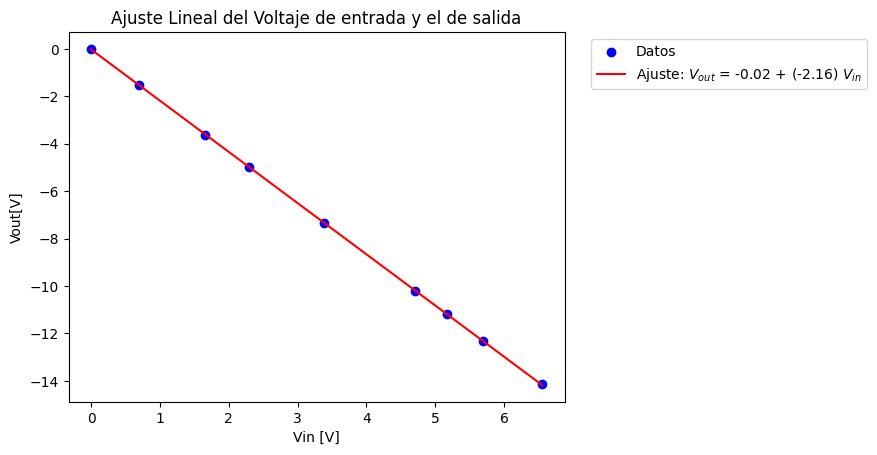

In [416]:
#Limitamos los datos para el ajuste lineal.
VoltajeIn = VoltajeInT[0:9].copy()
VoltajeOut = VoltajeOutT[0:9].copy()

VoltajeIn,VoltajeOut = ConverArray2(VoltajeIn,VoltajeOut)

#Ponemos los datos en una tabla.
data = {'Vin [V]': VoltajeIn,
        'Vout[V]': VoltajeOut}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slopeinversor, interceptinversor], r = np.polyfit(VoltajeIn,VoltajeOut,deg=1,cov=True)
print("R=", slopeinversor,"\nOrdenada en el origen: ", interceptinversor,"\n coorel coef=",r)

print(f'El valor de la amplificacion experimental es: {slopeinversor}')
# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return interceptinversor + slopeinversor * x

# Graficamos los datos y el ajuste lineal
plt.scatter(VoltajeIn, VoltajeOut, label='Datos', color='blue')
plt.plot(VoltajeIn, ajuste_lineal(VoltajeIn), color='red', label=fr'Ajuste: $V_{{out}}$ = {interceptinversor:.2f} + ({slopeinversor:.2f}) $V_{{in}}$')
plt.xlabel('Vin [V]')
plt.ylabel('Vout[V]')
plt.title('Ajuste Lineal del Voltaje de entrada y el de salida')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()



---
<h1 style="text-align: center;">[P2.C4]</h1>

---




In [417]:
#Preparamos los datos para que el ajuste lineal, la curva y los datos experimentales.

#Parte Teórica
VinT = np.linspace(0,9,40)
R1T = Rmedida1[0]
R2T = Rmedida2[0]
AvT = -(R2T/R1T)
VoutT = AvT * VinT

#Parte Experimental
VinE = np.linspace(0,VoltajeIn[-1],40)
AvE = slopeinversor
VoutE = AvE * VinE

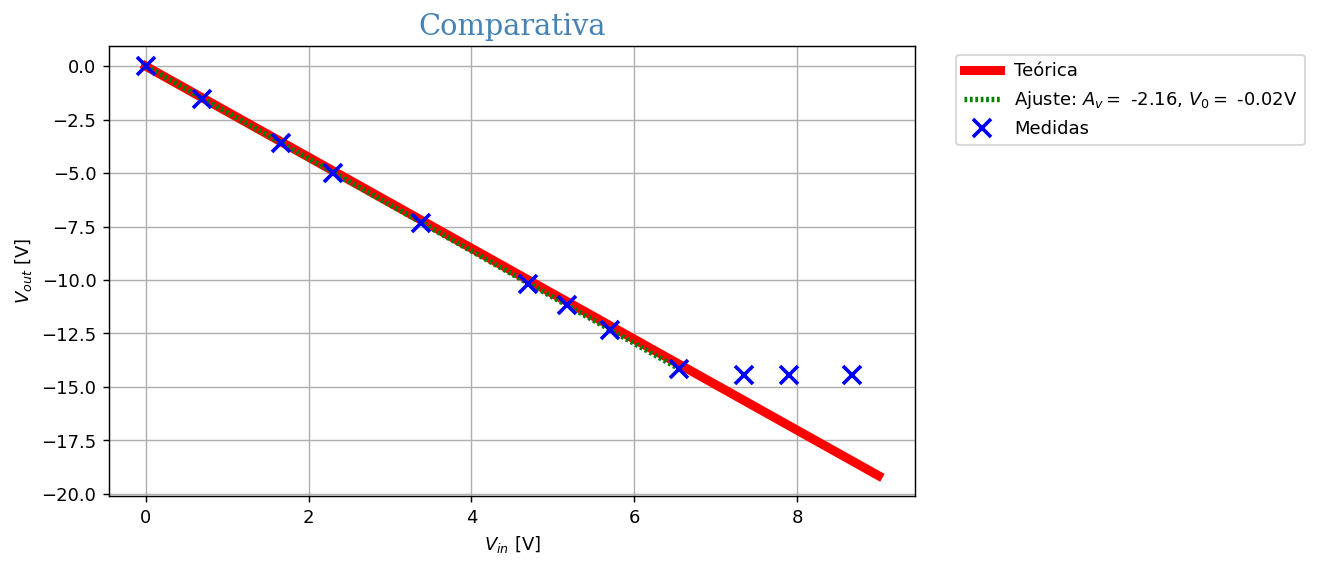

In [418]:
plt.figure(figsize=(8, 4.5), dpi=130)
plt.title("Comparativa", fontdict = {'family':'serif','color':'steelblue','size':16})
#plt.scatter(0, VoltajeTeo, color="black", s=100, label="Corte con la Ordenada")
plt.plot(VinT,VoutT, color="r", lw=5,label="Teórica")
plt.plot(VinE,VoutE, color="green",dashes=[0.5, 0.5],lw=3,label=fr"Ajuste: $A_{{v}}=$ {round(AvE,2)}, $V_{{0}}=$ {round(interceptinversor,2)}V")
plt.plot(VoltajeInT,VoltajeOutT, color="b",ls="",marker='x',ms=10,markeredgewidth=2,label="Medidas")
plt.xlabel(r"$V_{in}$ [V]")
plt.ylabel(r"$V_{out}$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid()
plt.show()

Como se observa tenemos una ganancia teórica $A_{vt}\ =\ -2.1276$ y ganancia práctica $A_{vp}\ =\ -2.1604$, estos datos dan un error relativo $\epsilon_{R}\ =\ 1.542\ \%$


---
<h1 style="text-align: center;">[P2.C5]</h1>

---


In [419]:
print(f'R2 Teorico: {Rmedida2[0]} KOhms   R2 Práctico: {Rmedida2[1]} KOhms')
print(f'R3 Teorico: {Rmedida3[0]} Ohms   R3 Práctico: {Rmedida3[1]} Ohms')

R3 Teorico: 3300 Ohms   R3 Práctico: 3260 Ohms


Con estos valores de las resistencias teoricos, obtenemos la ganancia teórica, esta ganancia tiene la siguiente expressión:

$A_V\ =\ 1+\dfrac{R_2}{R_3}$


In [420]:
print(f'El valor de la ganancia es: {1+(Rmedida2[0]/Rmedida3[0])} .')

El valor de la ganancia es: 4.03030303030303 .


---
<h1 style="text-align: center;">[P2.C6]</h1>

---


In [421]:
DatosTarea2 = pd.read_excel(xlsx_name,sheet_name='Tarea2',usecols='A:B')

VoltajeInT2 = DatosTarea2["Vin"].tolist()
VoltajeOutT2 = DatosTarea2["Vout"].tolist()

---
<h1 style="text-align: center;">[P2.C7]</h1>

---

Datos:
   Vin [V]  Vout[V]
0     0.00     0.00
1     0.48     1.93
2     0.73     2.93
3     1.11     4.45
4     1.55     6.27
5     2.07     8.34
6     2.63    10.60
7     3.05    12.32

Datos ajuste: R= 4.038558601222561 
Ordenada en el origen:  -0.011006368275768 
 coorel coef= [[ 3.05321806e-05 -4.43479923e-05]
 [-4.43479923e-05  9.50398085e-05]]
El valor de la amplificacion experimental es: 4.038558601222561


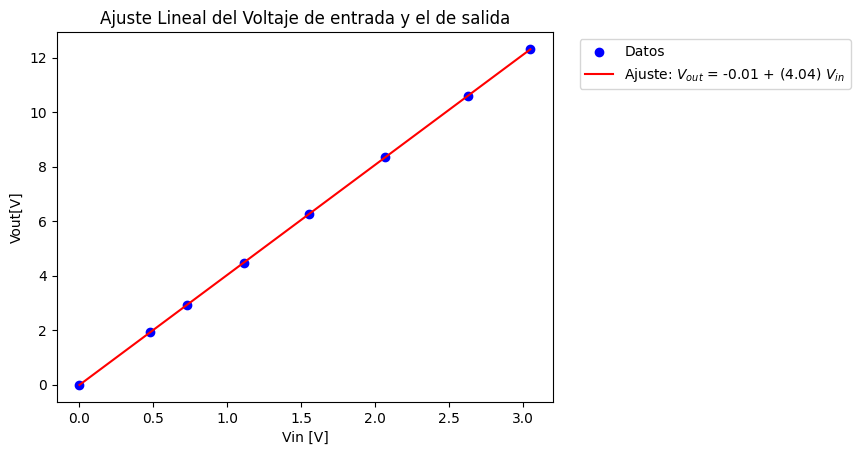

In [422]:
#Limitamos los datos para el ajuste lineal.
VoltajeIn2 = VoltajeInT2[0:8].copy()
VoltajeOut2 = VoltajeOutT2[0:8].copy()
VoltajeIn2,VoltajeOut2 = ConverArray2(VoltajeIn2,VoltajeOut2)

#Ponemos los datos en una tabla.
data = {'Vin [V]': VoltajeIn2,
        'Vout[V]': VoltajeOut2}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slopenoinversor, interceptNI], r = np.polyfit(VoltajeIn2,VoltajeOut2,deg=1,cov=True)
print("R=", slopenoinversor,"\nOrdenada en el origen: ", interceptNI,"\n coorel coef=",r)

print(f'El valor de la amplificacion experimental es: {slopenoinversor}')
# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return interceptNI + slopenoinversor * x

# Graficamos los datos y el ajuste lineal
plt.scatter(VoltajeIn2, VoltajeOut2, label='Datos', color='blue')
plt.plot(VoltajeIn2, ajuste_lineal(VoltajeIn2), color='red', label=fr'Ajuste: $V_{{out}}$ = {interceptNI:.2f} + ({slopenoinversor:.2f}) $V_{{in}}$')
plt.xlabel('Vin [V]')
plt.ylabel('Vout[V]')
plt.title('Ajuste Lineal del Voltaje de entrada y el de salida')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()



---
<h1 style="text-align: center;">[P2.C8]</h1>

---

In [423]:
#Preparamos los datos para que el ajuste lineal, la curva y los datos experimentales.

#Parte Teórica
VinT2 = np.linspace(0,5,40)
R2T = Rmedida2[0]
R3T = Rmedida3[0]
AvT2 = 1+(R2T/R3T)
VoutT2 = AvT2 * VinT2

#Parte Experimental
VinE2 = np.linspace(0,VoltajeIn2[-1],40)
AvE2 = slopenoinversor
VoutE2 = AvE2 * VinE2

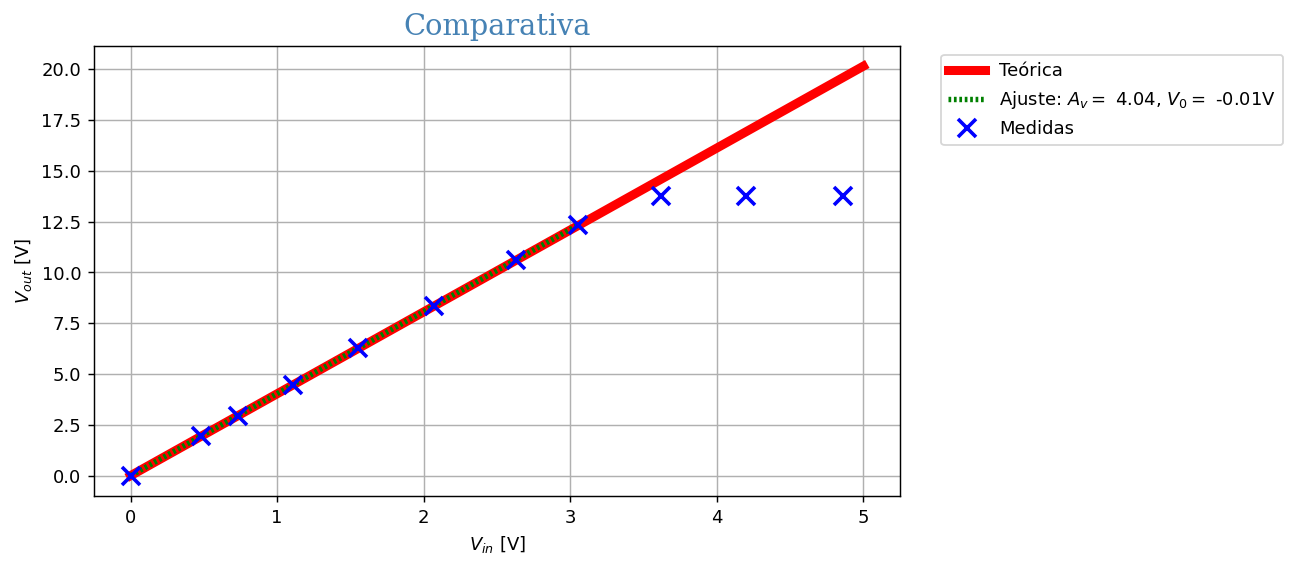

In [424]:
plt.figure(figsize=(8, 4.5), dpi=130)
plt.title("Comparativa", fontdict = {'family':'serif','color':'steelblue','size':16})
#plt.scatter(0, VoltajeTeo, color="black", s=100, label="Corte con la Ordenada")
plt.plot(VinT2,VoutT2, color="r", lw=5,label="Teórica")
plt.plot(VinE2,VoutE2, color="green",dashes=[0.5, 0.5],lw=3,label=fr"Ajuste: $A_{{v}}=$ {round(AvE2,2)}, $V_{{0}}=$ {round(interceptNI,2)}V")
plt.plot(VoltajeInT2,VoltajeOutT2, color="b",ls="",marker='x',ms=10,markeredgewidth=2,label="Medidas")
plt.xlabel(r"$V_{in}$ [V]")
plt.ylabel(r"$V_{out}$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid()
plt.show()

Como se observa tenemos una ganancia teórica $A_{vt}\ =\ 4.03030$ y ganancia práctica $A_{vp}\ =\ 4.038$, estos datos un $\epsilon_{R}\ =\ 0.191\ \%$
